<img src="https://miro.medium.com/max/602/1*eNseZEXViToel_oC_vfSzQ.png" width="700" align="centr"/>

<p style="font-family: Arials; line-height: 1,5; font-size: 12px; text-align: center; color: '#000000"><a href="https://miro.medium.com/max/602/1*eNseZEXViToel_oC_vfSzQ.png" style="color:#DC143C">Image source</a></p>
<p style="font-family: Arials; line-height: 1.3; font-size: 26px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #DC143C">Quora Questions Duplicacy</p>

<p style="font-family: Arials; font-size: 18px; text-align: center; color: Black">Hello everyone! I would like to present you my new work.</p>

<p style="font-family: Arials; font-size: 18px; text-align: center; color: Black">In this notebook you will see from the basic how to handle the NLP data sets. All the things that i have done in this notebook will be very useful for fresher</p>
<p style="font-family: Arials; font-size: 18px; text-align: center; color: Black">I would be very grateful for any feedback on this work and your vote. Happy reading.</p>

<p style="font-family: Arials; font-size: 18px; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #DC143C; line-height:1.0">TABLE OF CONTENTS</p>
<hr style="height: 0.5px; border: 0; background-color: 'Black'">

<p style="font-family: Arials; font-size: 16px; font-style: bold; letter-spacing: 2px; color: #DC143C; line-height:1.0"><a href="#part1" style="color:black">1. INTRODUCTION.</a></p>

<p style="font-family: Arials; font-size: 16px; font-style: bold; letter-spacing: 2px; color: #DC143C; line-height:1.0"><a href="#part2" style="color:black">2. IMPORT LIBRARIES AND DATA SET.</a></p>


<p style="font-family: Arials; font-size: 16px; font-style: bold; letter-spacing: 2px; color: #DC143C; line-height:1.0"><a href="#part3" style="color:black">3 DATA EXPLORATION AND CLEANING</a></p>

<p style="font-family: Arials; font-size: 16px; font-style: bold; letter-spacing: 2px; color: #DC143C; line-height:1.0"><a href="#part4" style="color:black">4 VISUALIZATION</a></p>

<p style="font-family: Arials; font-size: 16px; font-style: bold; letter-spacing: 2px; color: #DC143C; line-height:1.0"><a href="#part6" style="color:black">3. THE BATTLE (DATA VISUALIZATION)</a></p>

<p style="text-indent: 2.5vw; font-family: Arials; font-size: 15px; letter-spacing: 2px; color: #DC143C; line-height:1.3">
<a href="#part7" style="color:black">3.1 ROUND ONE: INFECTION</a></p>

<p style="text-indent: 2.5vw; font-family: Arials; font-size: 15px; letter-spacing: 2px; color: #DC143C; line-height:1.3">
<a href="#part8" style="color:black">3.2 ROUND TWO: CREATING NEW WEAPONS (VACCINE)</a></p>

<p style="text-indent: 2.5vw; font-family: Arials; font-size: 15px; letter-spacing: 2px; color: #DC143C; line-height:1.3">
<a href="#part9" style="color:black">3.3 FINAL ROUND: A FALL OF DARKNESS (MASS VACCINATION) </a></p>

<p style="text-indent: 2.5vw; font-family: Arials; font-size: 15px; letter-spacing: 2px; color: #DC143C; line-height:1.3">
<a href="#part10" style="color:black">3.4 BONUS INFORMATION </a></p>

<p id="part1"></p>

# <span style="font-family: Arials; font-size: 18px; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #DC143C">1. INTRODUCTION</span>


<p style="font-family: Arials; font-size: 18px;font-weight: bold; color: 'Black">Quora is a social question-and-answer website based in Mountain View, California, United States, and founded on June 25, 2009. The website was made available to the public on June 21, 2010. Users can collaborate by editing questions and commenting on answers that have been submitted by other users..</p>


<p style="font-family: Arials; font-size: 18px; text-align: center; color: Black;color: #DC143C">Now let's see what is the problem statment.</p>

<p style="font-family: Arials; font-size: 18px; text-align: center; color: Black">Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.</p>

<p id="part2"></p>

# <span style="font-family: Arials; font-size: 18px; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #DC143C">2. LIBRARIES & IMPORT DATA SET</span>




In [1]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



In [2]:
df=pd.read_csv("/kaggle/input/quora-duplicate-qns/quora.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)
df.drop("index",axis=1,inplace=True)
df.drop("qid1",axis=1,inplace=True)
df.drop("qid2",axis=1,inplace=True)




<p id="part3"></p>

# <span style="font-family: Arials; font-size: 18px; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #DC143C">3. DATA EXPLORATION</span>

In [3]:
df.head()

,id,question1,question2,is_duplicate
0,8067,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
1,368101,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0
2,70497,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0
3,226567,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1
4,73186,How close we are to see 3rd world war?,How close is a World War III?,1


In [4]:
df.shape

(100000, 4)

#### There are 1lakh rows and 4 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            100000 non-null  int64 
 1   question1     100000 non-null  object
 2   question2     100000 non-null  object
 3   is_duplicate  100000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.1+ MB


In [6]:
df.isna().sum()

id              0
question1       0
question2       0
is_duplicate    0
dtype: int64

#### There is no missing data

In [7]:
df.duplicated().sum()

0

#### There are no duplicate rows present in the data

<p id="part4"></p>

# <span style="font-family: Arials; font-size: 18px; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #DC143C">4. VISUALIZATIONS</span>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


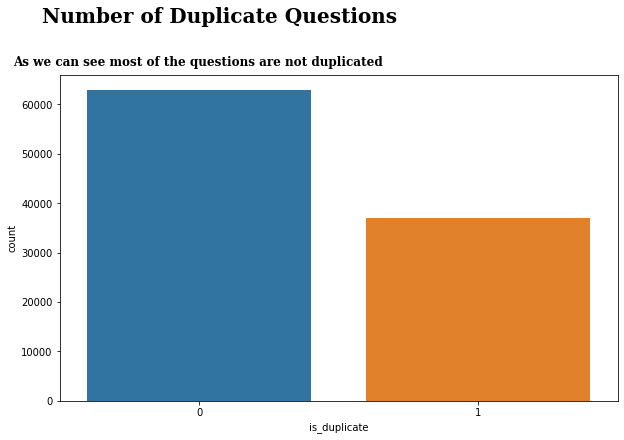

In [8]:
fig=plt.figure(figsize=(10,6))
ax=sns.countplot(df["is_duplicate"])
fig.text(0.1,1,'Number of Duplicate Questions  ', {'font':'serif', 'size':20, 'weight':'bold'})
fig.text(0.06,0.9,'As we can see most of the questions are not duplicated  ', {'font':'serif', 'size':12, 'weight':'bold'})
fig.show()


In [9]:
count=df["is_duplicate"].value_counts().values
count

fig = go.Figure()
fig.add_trace(go.Bar(
    x=['not_duplicates'],
    y=[count[0]],
    name='not_duplicates',
    text=[count[0]],
    textposition='auto',))
fig.add_trace(go.Bar(x=['duplicates'],y=[count[1]],
                    name='duplicates',text=[count[1]],textposition='auto'))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Number of Duplicates and not Duplicates</span>')

fig.show()

### Let's make new columns : (Number of words in questions)

In [10]:
df["size_question1"]=df["question1"].apply(lambda x:len(x.split(' ')))
df["size_question2"]=df["question2"].apply(lambda x:len(x.split(' ')))

In [11]:
not_dup=df[df["is_duplicate"]==0]["size_question1"].value_counts().sort_index()
dup=df[df["is_duplicate"]==1]["size_question1"].value_counts().sort_index()
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=not_dup.index,
    y=not_dup.values,
    name='not_dup',
    fill='tozeroy',
    
))
fig.add_trace(go.Scatter(
    x=dup.index,
    y=dup.values,
    name='dup',
    fill='tozeroy',
    
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Distribution of words of duplicate and not duplicate on question 1</span>'
)
fig.update_xaxes(range=[0, 70])
fig.show()

In [12]:
not_dup=df[df["is_duplicate"]==0]["size_question2"].value_counts().sort_index()
dup=df[df["is_duplicate"]==1]["size_question2"].value_counts().sort_index()
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=not_dup.index,
    y=not_dup.values,
    name='not_dup',
    fill='tozeroy',
    
))
fig.add_trace(go.Scatter(
    x=dup.index,
    y=dup.values,
    name='dup',
    fill='tozeroy',
    
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Distribution of words of duplicate and not duplicate on question 2</span>'
)
fig.update_xaxes(range=[0, 70])
fig.show()

<p id="part4"></p>

# <span style="font-family: Arials; font-size: 18px; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #DC143C">5. MAKE DATA SET READY FOR MODELLING</span>

<p id="part4"></p>

# <span style="font-family: Arials; font-size: 18px; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #DC143C">5.1 CLEANING</span>

In [13]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [14]:
df['question1']=df['question1'].apply(clean_text)
df['question2']=df['question2'].apply(clean_text)



## cleaned data:

In [15]:
df.head(3)

,id,question1,question2,is_duplicate,size_question1,size_question2
0,8067,how do i play pokémon go in korea,how do i play pokémon go in china,0,8,8
1,368101,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,11,9
2,70497,which is more advisable and better material fo...,what is the best server setup for buddypress,0,16,8


<p id="part4"></p>

<span style="font-family: Arials; font-size: 18px; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #DC143C">5.2 STOP WORDS</span>

In [16]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    

df['question1']=df['question1'].apply(remove_stopwords)
df['question2']=df['question2'].apply(remove_stopwords)

df.head()

,id,question1,question2,is_duplicate,size_question1,size_question2
0,8067,play pokémon go korea,play pokémon go china,0,8,8
1,368101,best side dishes crab cakes,good side dishes buffalo chicken,0,11,9
2,70497,advisable better material crash test automobil...,best server setup buddypress,0,16,8
3,226567,improve logical programming skills,improve logical skills programming,1,7,9
4,73186,close see world war,close world war iii,1,9,7


<p id="part4"></p>

<span style="font-family: Arials; font-size: 18px; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #DC143C">5.3 STEMMING</span>

In [17]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [18]:

df['question1']=df['question1'].apply(stemm_text)
df['question2']=df['question2'].apply(stemm_text)
df.head()

,id,question1,question2,is_duplicate,size_question1,size_question2
0,8067,play pokémon go korea,play pokémon go china,0,8,8
1,368101,best side dish crab cake,good side dish buffalo chicken,0,11,9
2,70497,advis better materi crash test automobil ducti...,best server setup buddypress,0,16,8
3,226567,improv logic program skill,improv logic skill program,1,7,9
4,73186,close see world war,close world war iii,1,9,7


## Target encoding:

<p id="part4"></p>

<span style="font-family: Arials; font-size: 18px; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #DC143C">5.4 WORD CLOUD</span>

## Word cloud

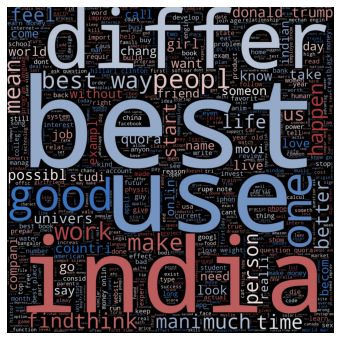

In [19]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df['question1'])

plt.rcParams['figure.figsize'] = (10,6)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 1000).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

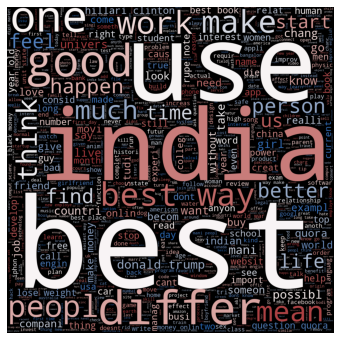

In [20]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df['question2'])

plt.rcParams['figure.figsize'] = (10,6)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 1000).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<p id="part4"></p>

<span style="font-family: Arials; font-size: 18px; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #DC143C">5.4 VECTORIZATION</span>

In [21]:
X = df['question1']+df['question2']
y = df['is_duplicate']

print(len(X), len(y))

100000 100000


In [22]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000,)
(20000,)
(80000,)
(20000,)


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [24]:
# learn training data vocabulary, then use it to create a document-term matrix
X_train_dtm = vect.transform(X_train)

In [25]:
# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)

In [26]:
# examine the document-term matrix
X_train_dtm

<80000x84319 sparse matrix of type '<class 'numpy.int64'>'
	with 626014 stored elements in Compressed Sparse Row format>

In [27]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<20000x84319 sparse matrix of type '<class 'numpy.int64'>'
	with 140991 stored elements in Compressed Sparse Row format>

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<80000x84319 sparse matrix of type '<class 'numpy.float64'>'
	with 626014 stored elements in Compressed Sparse Row format>

<p id="part4"></p>

<span style="font-family: Arials; font-size: 18px; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #DC143C">6 MODELLING</span>

<p id="part4"></p>

<span style="font-family: Arials; font-size: 18px; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #DC143C">6.1 LOGISTIC REGRESSION</span>

In [29]:
# import an instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')

In [30]:
# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

CPU times: user 3.86 s, sys: 15 ms, total: 3.87 s
Wall time: 2.08 s


LogisticRegression(solver='liblinear')

In [31]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

In [32]:
from sklearn import metrics

In [33]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.7396

In [34]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[10588,  1982],
       [ 3226,  4204]])

In [35]:
vec=CountVectorizer(ngram_range=(2, 2))
vec.fit(X_train)

CountVectorizer(ngram_range=(2, 2))

In [36]:
X_train_dtm = vect.transform(X_train)

In [37]:
X_train_dtm = vect.fit_transform(X_train)

In [38]:
X_train_dtm

<80000x84319 sparse matrix of type '<class 'numpy.int64'>'
	with 626014 stored elements in Compressed Sparse Row format>

# Checking the words :
print(vect.get_feature_names())

In [39]:
print(X_train_dtm.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [40]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<20000x84319 sparse matrix of type '<class 'numpy.int64'>'
	with 140991 stored elements in Compressed Sparse Row format>

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<80000x84319 sparse matrix of type '<class 'numpy.float64'>'
	with 626014 stored elements in Compressed Sparse Row format>

In [42]:
# import an instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

CPU times: user 3.98 s, sys: 16.8 ms, total: 4 s
Wall time: 2.05 s


0.7396

<p id="part4"></p>

<span style="font-family: Arials; font-size: 18px; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #DC143C">6.2 RANDOM FOREST</span>

In [43]:
# import an instantiate a logistic regression model
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
# train the model using X_train_dtm
%time RF.fit(X_train_dtm, y_train)
# make class predictions for X_test_dtm
y_pred_class = RF.predict(X_test_dtm)
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

CPU times: user 11min 29s, sys: 575 ms, total: 11min 29s
Wall time: 11min 29s


0.76625

<p id="part4"></p>

<span style="font-family: Arials; font-size: 18px; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #DC143C">6.3 SUPPORT VECTOR</span>

In [44]:
# import an instantiate a logistic regression model
from sklearn.svm import SVC
SVC = SVC()
# train the model using X_train_dtm
%time SVC.fit(X_train_dtm, y_train)
# make class predictions for X_test_dtm
y_pred_class = SVC.predict(X_test_dtm)
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

CPU times: user 26min 42s, sys: 591 ms, total: 26min 43s
Wall time: 26min 43s


0.76005

<p id="part4"></p>

<span style="font-family: Arials; font-size: 18px; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #DC143C">6.4 NAIVE BAYES</span>

In [45]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [46]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

CPU times: user 23.2 ms, sys: 0 ns, total: 23.2 ms
Wall time: 23.2 ms


MultinomialNB()

In [47]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [48]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.7367

In [49]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[10674,  1896],
       [ 3370,  4060]])